# EDA

Explore the classes and images

In [1]:
# imports
import pandas as pd
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.utils import image_dataset_from_directory

### Functions

In [4]:
def class_sizes(path, x_label, x_ticks_list=None):
    '''
    Visualize the distribution of the classes for disease, inspired by https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
    Input: disease name, str (the term used in the path to the files)
    Output: Bar chart with the distribution of the classes
    Returns: Dictionary with names of the classes and sizes
    '''
    class_sizes = {}
    for class_name in listdir(path):
        class_sizes[class_name] = len(listdir(f'{path}/{class_name}'))
    plt.figure(figsize=(12, 8))
    plt.bar(class_sizes.keys(), class_sizes.values(), width = .5)
    plt.title("Number of Images by Class", size = 20)
    plt.xlabel(x_label, size = 20)
    if x_ticks_list:
        plt.xticks(np.arange(4), x_ticks_list, size = 15)
    plt.ylabel('# Images', size = 20);
    return class_sizes

In [23]:
def im_sizes(directory):
    '''
    
    '''
    h = []
    w = []
    path = f'../data/alzheimer/train/{directory}/'
    for image in listdir(path):
        if '.jpg' in image:
            im_gray = cv2.imread(f'{path}{image}', cv2.IMREAD_GRAYSCALE)
            h.append(im_gray.shape[0]) 
            w.append(im_gray.shape[1])

    df_sizes = pd.DataFrame({'height': h, 'width': w})
    return df_sizes

In [39]:
def all_im_sizes(path):
    '''
    
    '''
    df_all_sizes = pd.DataFrame()
    for directory in listdir(al_path_train):
        df_dir = im_sizes(directory)
        df_all_sizes = pd.concat([df_all_sizes, df_dir])
    mean_height = df_all_sizes['height'].mean()
    mean_width = df_all_sizes['width'].mean()
    print(f'Average height: {mean_height}')
    print(f'Average width: {mean_width}')
    return df_all_sizes

Average height: 208.0
Average width: 176.0


,height,width
0,208,176
1,208,176
2,208,176
3,208,176
4,208,176


In [41]:
# Show several images from training data
def plot_sample(data):
    '''
    
    '''
    plt.figure(figsize=(10, 10))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(data.class_names[labels[i]])
            plt.axis("off")

## Alzheimer's 

In [2]:
# The path to the training set
al_path_train = '../data/alzheimer/train'

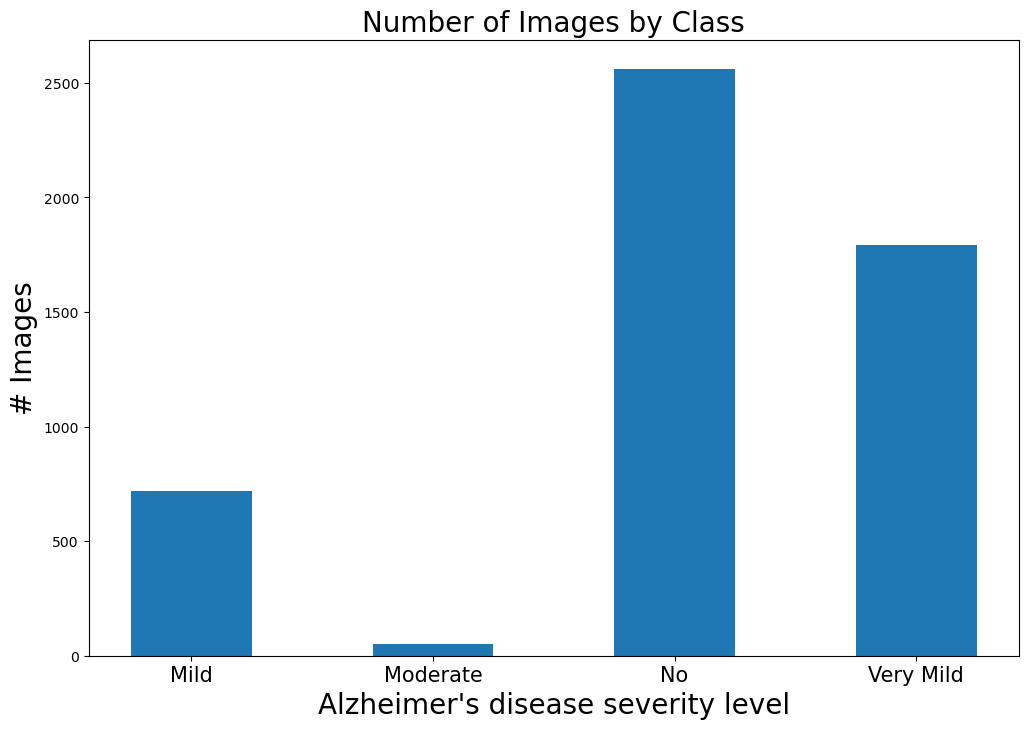

In [9]:
# Make dictionary of the sizes of classes
al_class_sizes = class_sizes(path = al_path_train, 
                             x_label = "Alzheimer's disease severity level",
                             x_ticks_list = ['Mild', 'Moderate', 'No', 'Very Mild'])

The classes are extremely imbalanced. I will need to use resampling to get better results from the model.

In [43]:
df_all_sizes = all_im_sizes(al_path_train)
df_all_sizes.head()

Average height: 208.0
Average width: 176.0


,height,width
0,208,176
1,208,176
2,208,176
3,208,176
4,208,176


All images for Alzheimer's disease are the same size, It is not too big, I will use it in the TensorFlow data preparetion.

In [33]:
# Sets for models using TensorFlow
al_train_ds, al_val_ds = image_dataset_from_directory(
    al_path_train,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(208, 176),
    seed=18,
    validation_split=0.2,
    subset = 'both'
)

Found 5123 files belonging to 4 classes.
Using 4099 files for training.
Using 1024 files for validation.


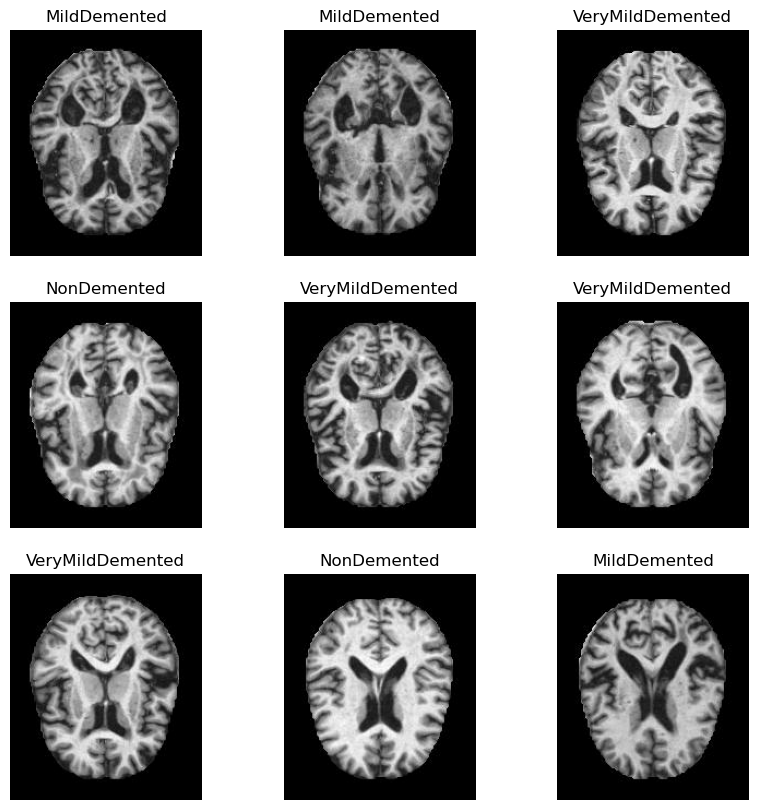

In [42]:
# Plot Sample of the data
plot_sample(al_train_ds)

In [36]:
# Check the shapes of images and lables
for image_batch, labels_batch in al_train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 208, 176, 3)
(32,)


## Brain Tumor

In [12]:
# The path to the training set
bt_path_train = '../data/brain_tumor/train'

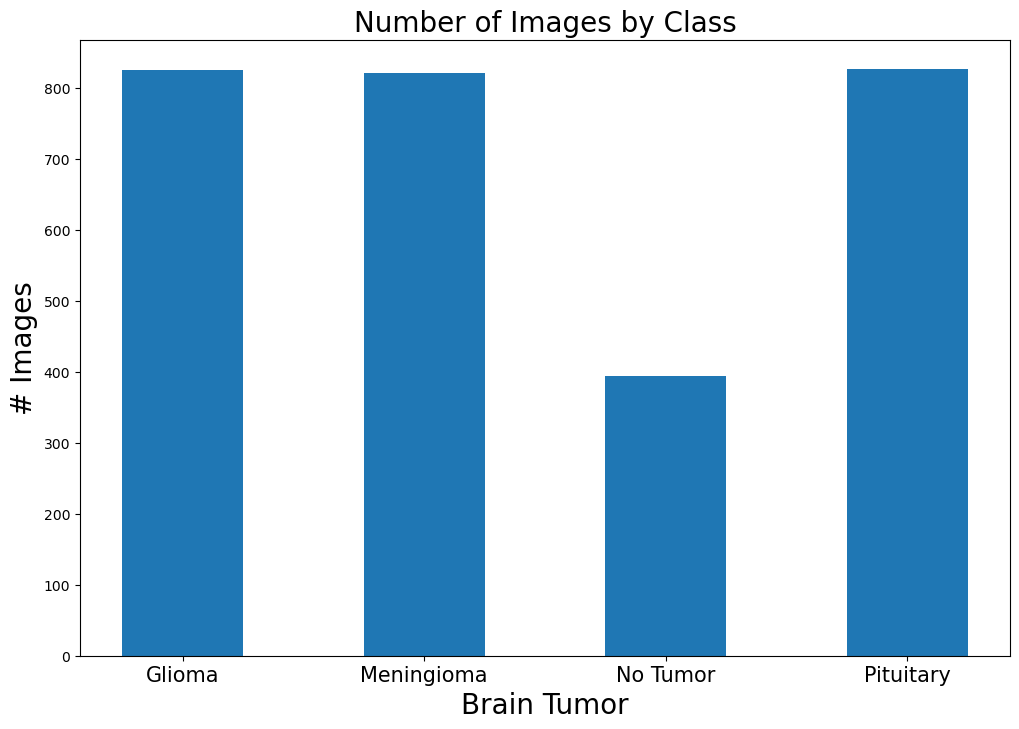

In [13]:
# Make dictionary of the sizes of classes
bt_class_sizes = class_sizes(path = bt_path_train,
                             x_label = "Brain Tumor",
                             x_ticks_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

The Classes of Brain tumors are close in the number of images, however, 'No Tumor' has about half fewer images. 

In [47]:
# Sets for models using TensorFlow
bt_train_ds, bt_val_ds = image_dataset_from_directory(
    bt_path_train,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    seed=18,
    validation_split=0.2,
    subset = 'both'
)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Using 574 files for validation.


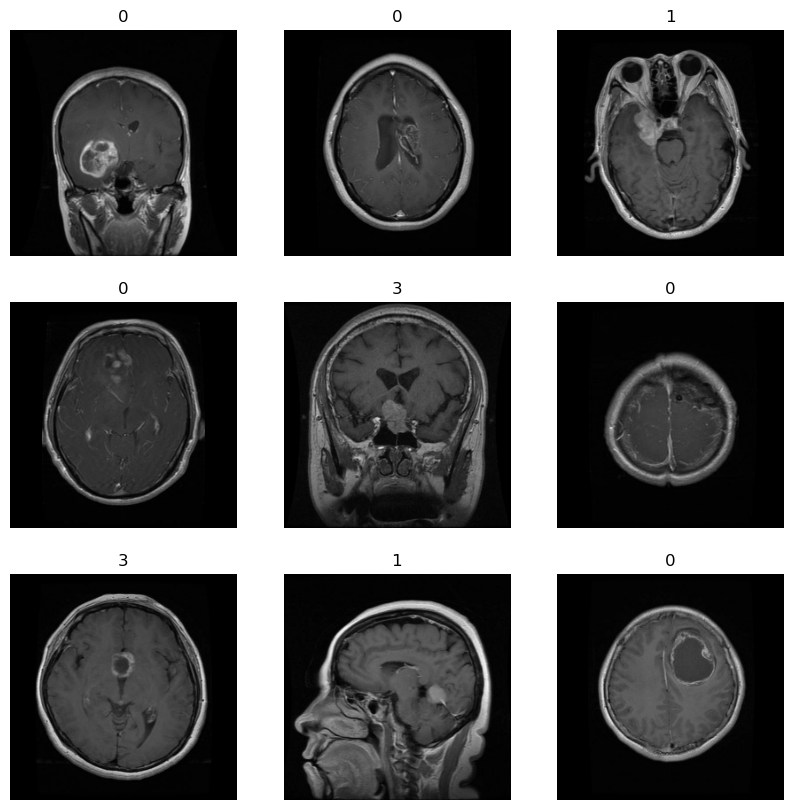

In [48]:
# Show several images from training data
plt.figure(figsize=(10, 10))
for images, labels in bt_train_ds.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")